In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

df = pd.read_csv('Life Expectancy Data.csv')


In [2]:
df['Status'] = df['Status'].replace(['Developing', 'Developed'],[0, 1])
df.head()

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,0,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,0,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,0,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,0,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,0,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


In [3]:
df1 = df.loc[((df['Country'] == 'Egypt') | (df['Country'] == 'Iraq') | (df['Country'] == 'Afghanistan'))] 
EI = df.loc[((df['Country'] == 'Egypt') | (df['Country'] == 'Iraq'))]
E= df.loc[(df['Country'] == 'Egypt')]
I= df.loc[(df['Country'] == 'Iraq')]

In [4]:
EI.head()

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
802,Egypt,2015,0,79.0,159.0,51,NaN,0.0,93.0,5432,...,93.0,NaN,93.0,0.1,NaN,NaN,2.8,2.8,0.688,13.1
803,Egypt,2014,0,78.0,161.0,53,0.21,0.0,94.0,1314,...,94.0,5.64,94.0,0.1,NaN,NaN,2.8,2.8,0.686,13.1
804,Egypt,2013,0,79.0,159.0,54,0.21,0.0,97.0,405,...,97.0,5.46,97.0,0.1,NaN,NaN,2.9,2.8,0.681,12.8
805,Egypt,2012,0,72.0,165.0,54,0.23,0.0,93.0,245,...,93.0,5.29,93.0,0.1,NaN,NaN,2.9,2.8,0.673,12.4
806,Egypt,2011,0,74.0,168.0,55,0.22,0.0,96.0,26,...,96.0,5.40,96.0,0.1,NaN,NaN,2.9,2.9,0.671,12.4


LinAlgError: singular matrix

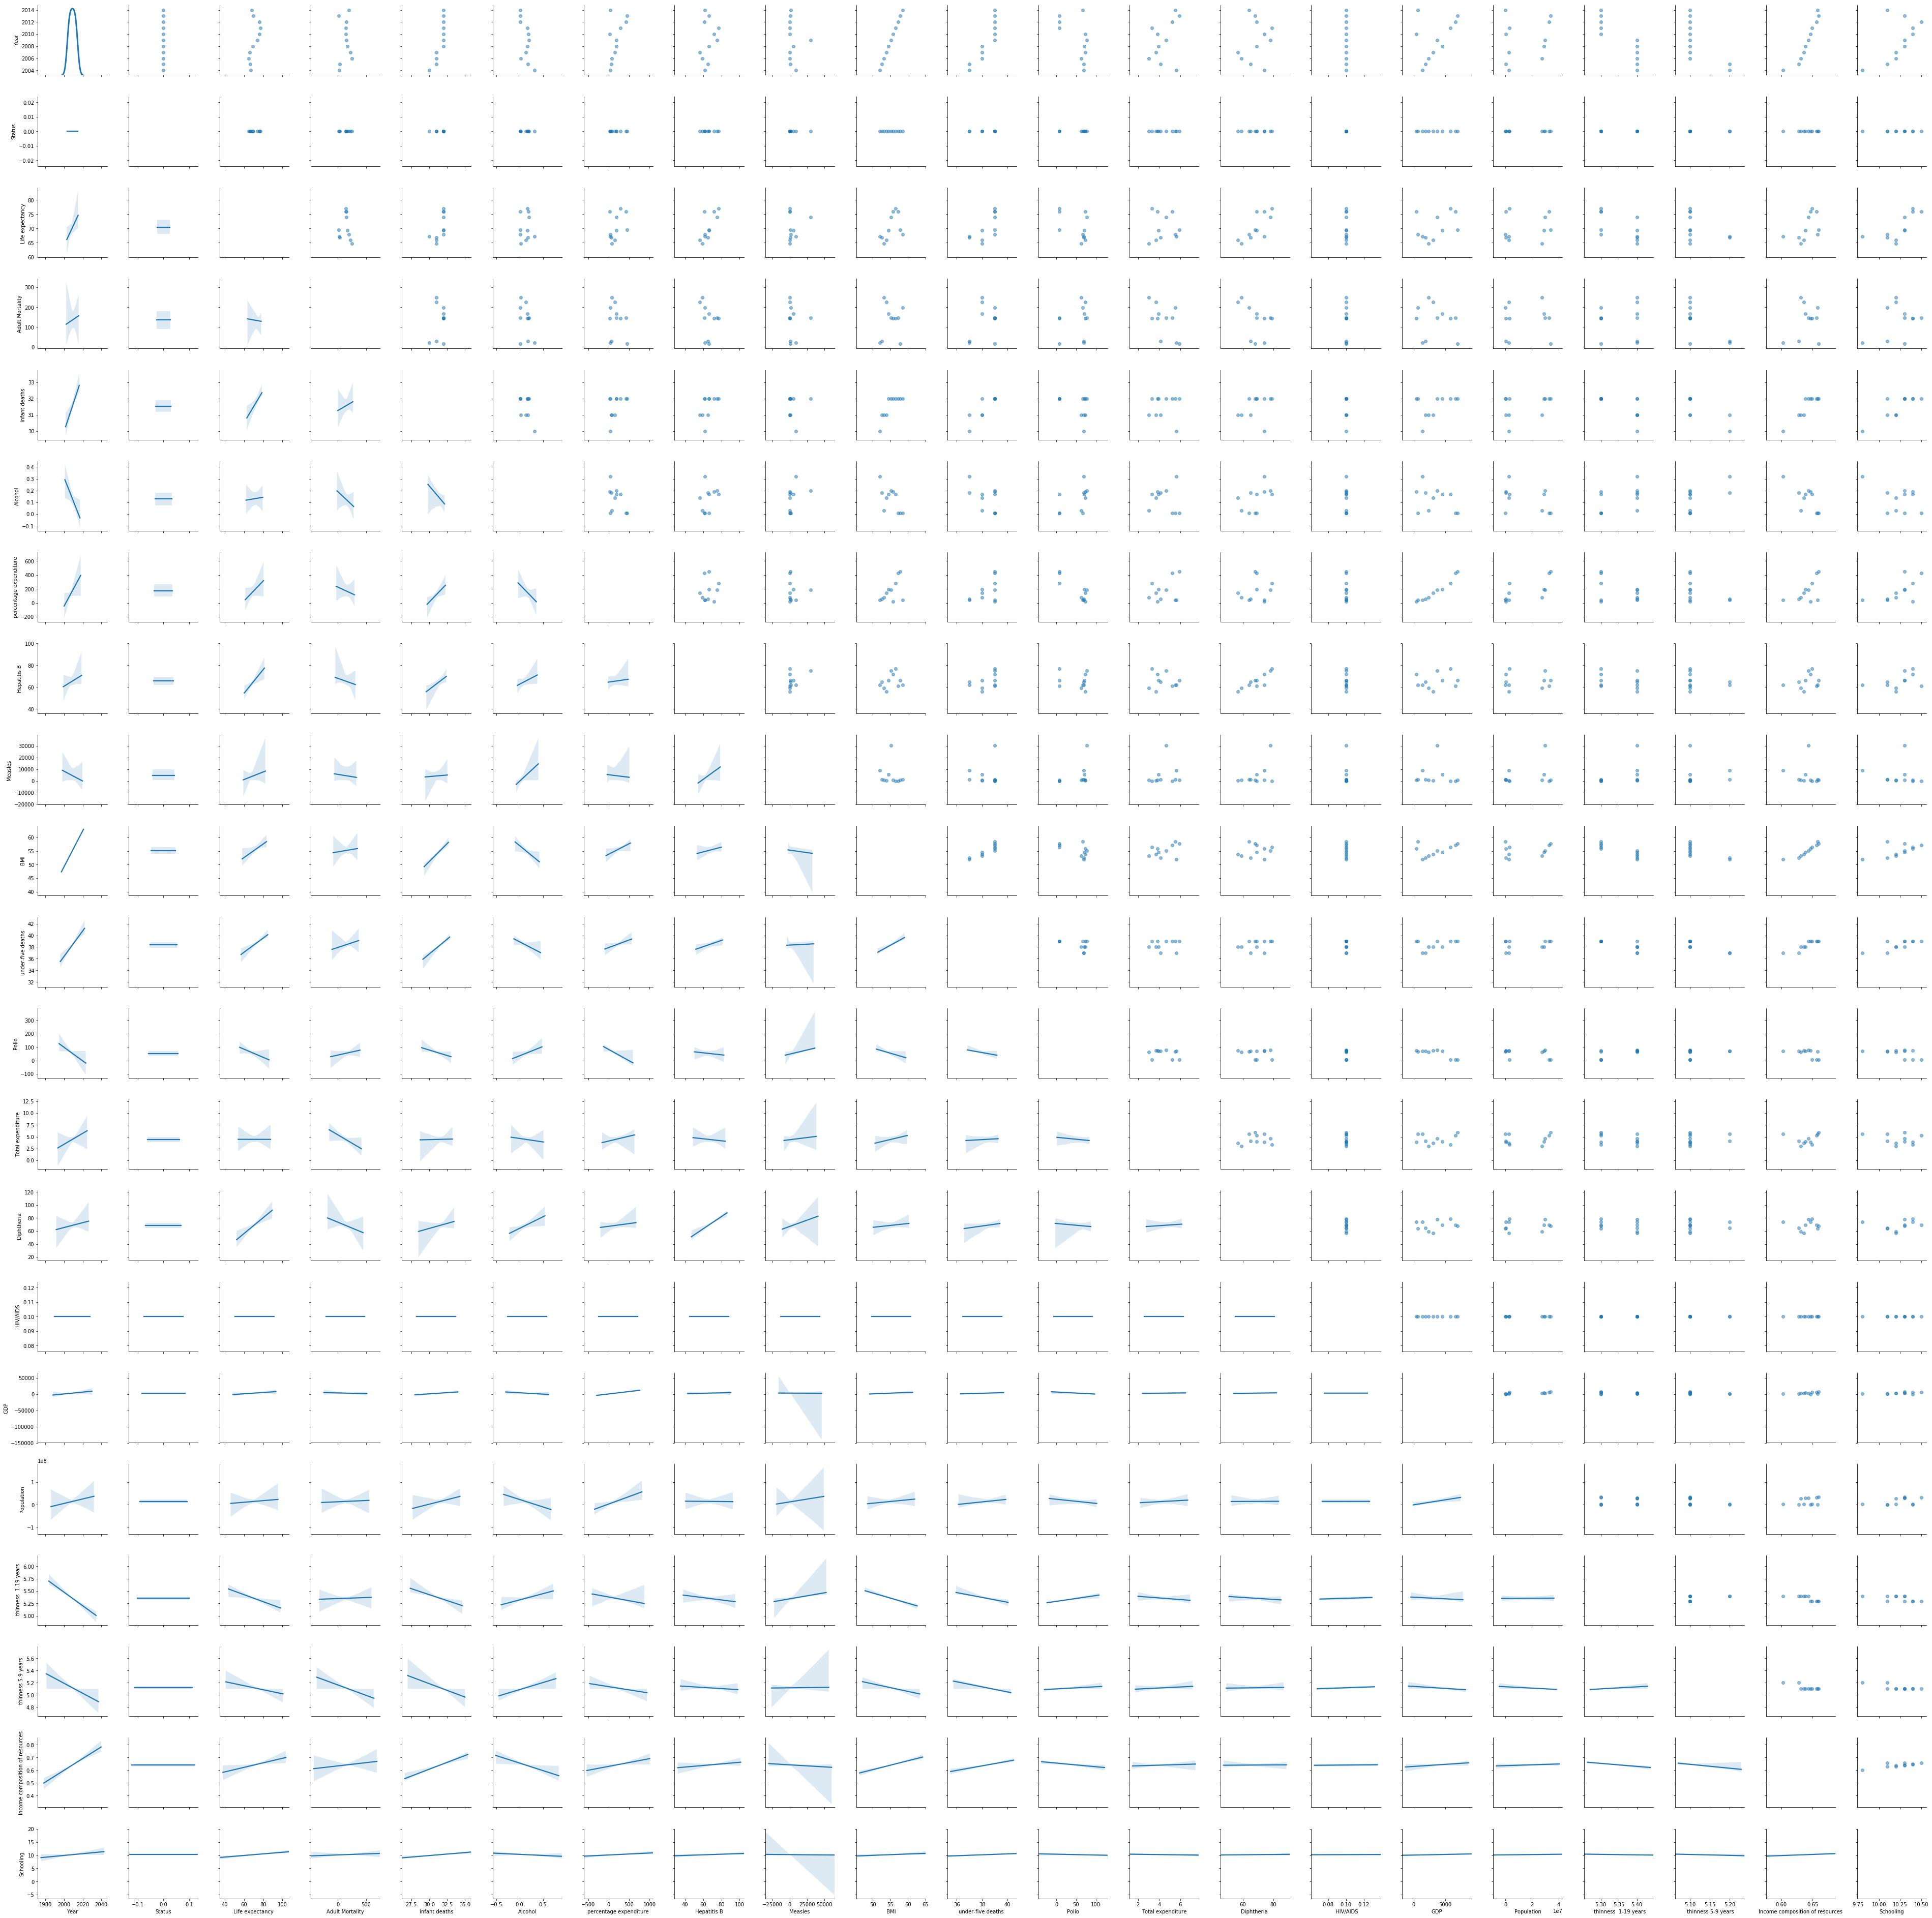

In [7]:
# Declare that you want to make a scatterplot matrix.
g = sns.PairGrid(EI.dropna(), diag_sharey=False)
# Scatterplot.
g.map_upper(plt.scatter, alpha=.5)
# Fit line summarizing the linear relationship of the two variables.
g.map_lower(sns.regplot, scatter_kws=dict(alpha=0))
# Give information about the univariate distributions of the variables.
g.map_diag(sns.kdeplot, lw=3)
plt.show()


In [ ]:
# Make the correlation matrix.
corr = df1.corr()

#print (corr)

f, ax = plt.subplots(figsize=(12, 9))

# Draw the heatmap in blues!
sns.heatmap(corr, cmap = "Blues", square=True)
plt.show()



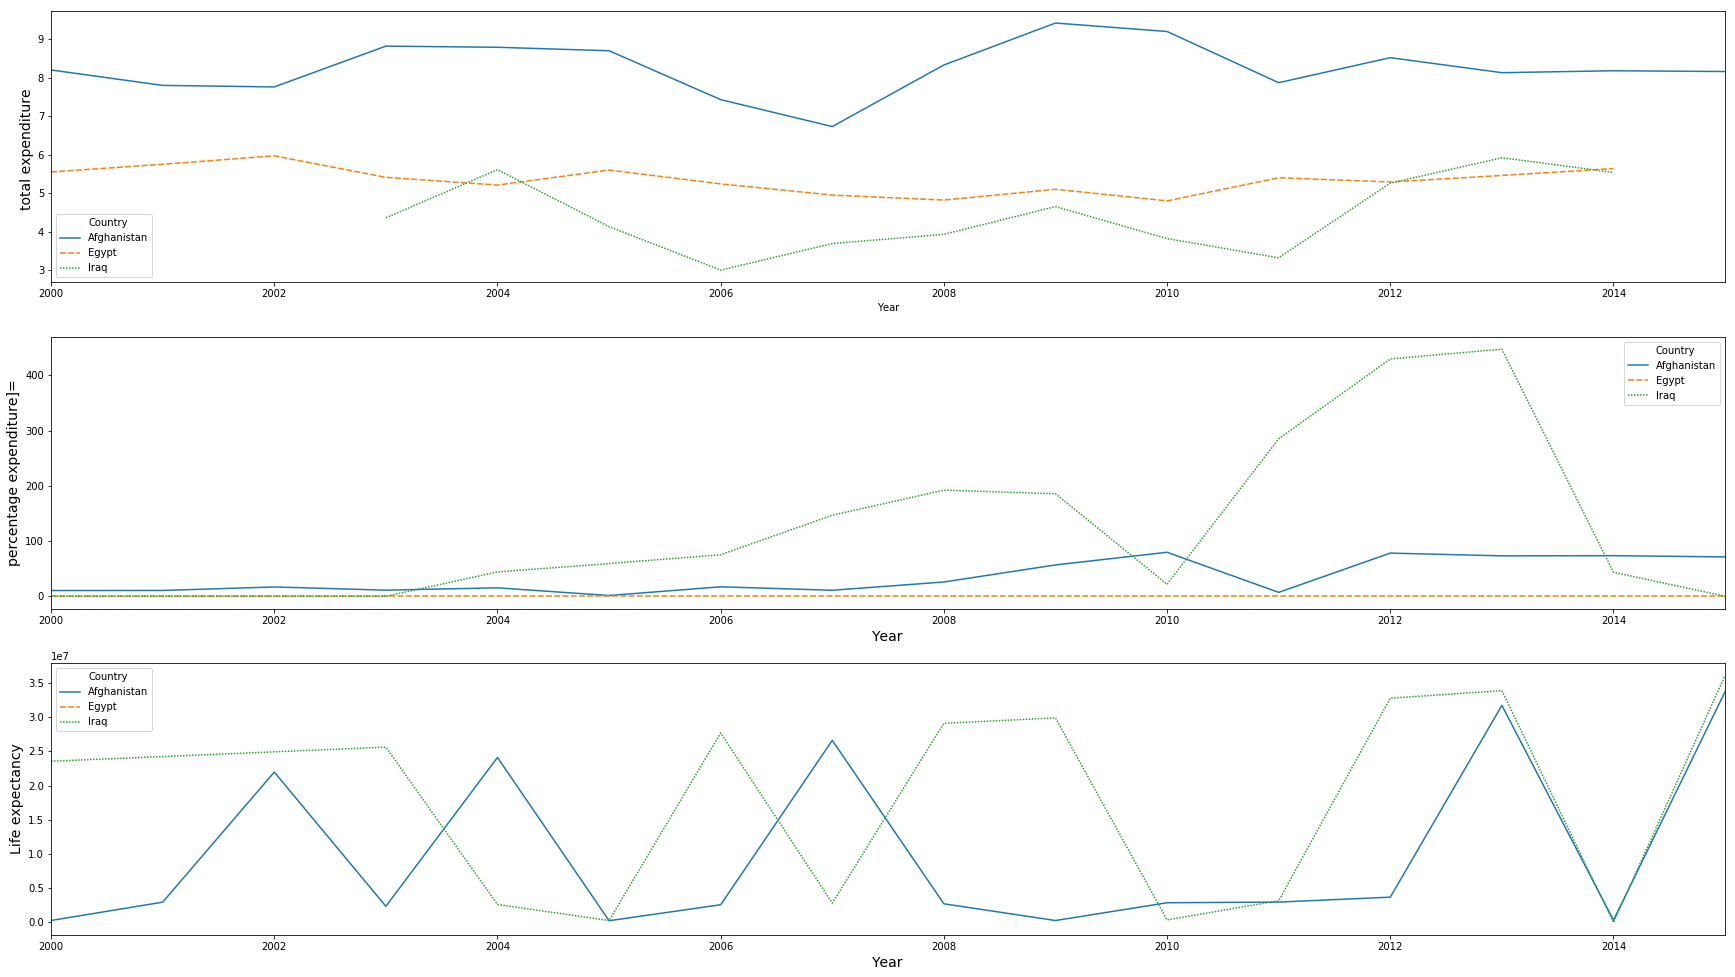

In [6]:
plt.figure(figsize=(30,17))

ax1 = plt.subplot(311)
sns.lineplot(x="Year", y="Total expenditure", hue="Country", style="Country", data=df1)
plt.ylabel('total expenditure ', Fontsize=14);
plt.xlim(2000,2015);


ax2 = plt.subplot(312)
sns.lineplot(x="Year", y="percentage expenditure", hue="Country", style="Country", data=df1)
plt.ylabel('percentage expenditure]=', Fontsize=14);
plt.xlabel('Year', Fontsize=14);
plt.xlim(2000,2015);


ax3 = plt.subplot(313)
sns.lineplot(x="Year", y="Population", hue="Country", style="Country", data=df1)
plt.ylabel('Life expectancy', Fontsize=14);
plt.xlabel('Year', Fontsize=14);
plt.xlim(2000,2015);



ValueError: could not broadcast input array from shape (16,1) into shape (16)

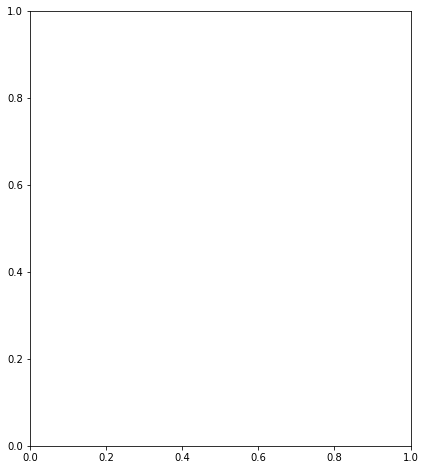

In [53]:

plt.figure(figsize=(15,8)) #subplot for my two boxplots
plt.subplot(1, 2, 1)
ax = sns.boxplot(x=['Year'], y=['infant deaths'], data=E).set_title('infant deaths in EGypt');
plt.xticks(rotation=45);

plt.subplot(1,2,2)
ax = sns.boxplot(x=['Year'], y=['infant deaths'], data=I).set_title('infant deaths in Iraq');
plt.xticks(rotation=45);

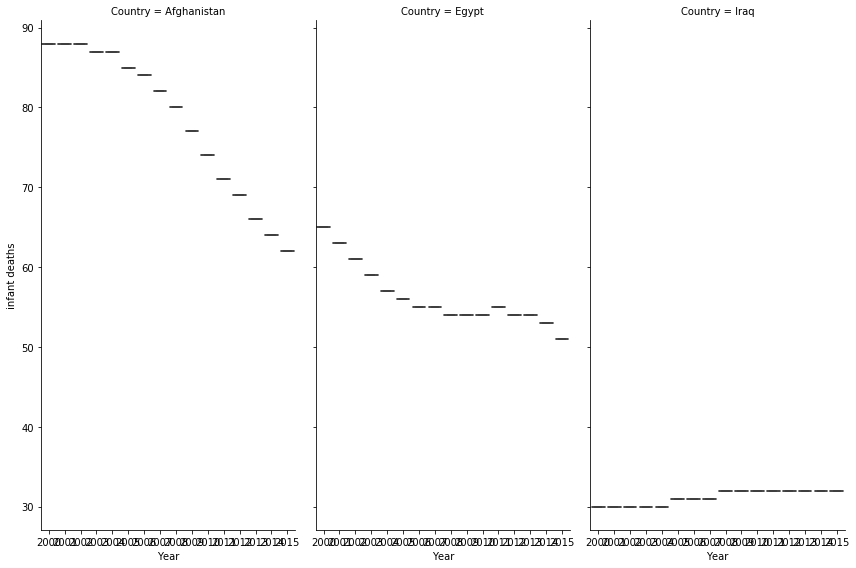

In [59]:
h = sns.FacetGrid(df1, col="Country", size=8, aspect=.5)
h = h.map(sns.boxplot, "Year", "infant deaths")
plt.show()
